In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows',80)
pd.set_option('display.max_columns',80)
pd.set_option('max_colwidth',300)

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
data=pd.read_csv('xAPI-Edu-Data.csv')

In [8]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [9]:
data.replace('KW','Kuwait',inplace=True)

In [10]:
data.replace('KuwaIT','Kuwait',inplace=True)

In [11]:
data.set_index('gender',inplace=True)

In [12]:
data.replace(['M', 'L', 'H'], ['SECOND_CLASS', 'THIRD_CLASS', 'FIRST_CLASS'],inplace=True)

In [13]:
data.replace(['S', 'F'], ['Second_Semester', 'First_Semester'],inplace=True)

In [14]:
data.drop(['SectionID'],axis=1,inplace=True)

In [15]:
data.drop(['PlaceofBirth'],axis=1,inplace=True)

In [16]:
data1=data.reset_index(drop=False)

In [17]:
data1.replace(['M', 'F'], ['Male', 'Female'],inplace=True)

In [18]:
data1

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,15,16,2,20,Yes,Good,Under-7,SECOND_CLASS
1,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,20,20,3,25,Yes,Good,Under-7,SECOND_CLASS
2,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,10,7,0,30,No,Bad,Above-7,THIRD_CLASS
3,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,30,25,5,35,No,Bad,Above-7,THIRD_CLASS
4,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,40,50,12,50,No,Bad,Above-7,SECOND_CLASS
5,Female,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,42,30,13,70,Yes,Bad,Above-7,SECOND_CLASS
6,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,35,12,0,17,No,Bad,Above-7,THIRD_CLASS
7,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,10,15,22,Yes,Good,Under-7,SECOND_CLASS
8,Female,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,12,21,16,50,Yes,Good,Under-7,SECOND_CLASS
9,Female,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,70,80,25,70,Yes,Good,Under-7,SECOND_CLASS


In [19]:
data1['gender'].value_counts()

Male      305
Female    175
Name: gender, dtype: int64

In [20]:
data1['raisedhands'].unique()

array([ 15,  20,  10,  30,  40,  42,  35,  50,  12,  70,  19,   5,  62,
        36,  55,  69,  60,   2,   0,   8,  25,  75,   4,  45,  14,  33,
         7,  13,  29,  39,  49,  16,  28,  27,  21,  80,  17,  65,  22,
        11,   1,   3, 100,   6,  90,  77,  24,  66,  23,  82,  72,  51,
        85,  87,  95,  81,  53,  92,  83,  67,  96,  57,  73,   9,  32,
        52,  59,  61,  79,  18,  74,  97,  41,  71,  98,  78,  89,  88,
        86,  76,  99,  84], dtype=int64)

In [21]:
def Participation (x):
    if x<=30:
        return 'Not Active'
    elif x<=65:
        return 'Active'
    else:
        return 'Very Active'
data1['Participation_by_hand_raising']=data1['raisedhands'].apply(Participation)


In [22]:
data1.VisITedResources.unique()

array([16, 20,  7, 25, 50, 30, 12, 10, 21, 80, 88,  6,  1, 14, 70, 40, 13,
       15, 60,  0,  2, 19, 85, 90,  5, 22, 11, 54, 35, 33,  4, 39, 75, 69,
        3,  8, 89, 44, 92, 26, 27, 29, 98,  9, 42, 65, 79, 55, 63, 91, 51,
       58, 68, 82, 72, 52, 62, 71, 66, 43, 95, 31, 41, 81, 61, 83, 84, 17,
       94, 48, 86, 74, 76, 97, 87, 99, 34, 64, 28, 38, 36, 24, 59, 57, 77,
       18, 93, 96, 78], dtype=int64)

In [23]:
def Library (x):
    if x<=30:
        return 'Not Frequently'
    elif x<=65:
        return 'Use Moderately'
    else:
        return 'Use Frequently'
data1['Library Usage']=data1['VisITedResources'].apply(Library)


In [24]:
data1.AnnouncementsView.unique()

array([ 2,  3,  0,  5, 12, 13, 15, 16, 25, 30, 19, 44, 22, 20, 35, 36, 40,
       33,  4, 52, 50, 10,  9,  8, 17, 26, 37,  7, 28,  1, 39,  6, 32, 70,
       18, 23, 11, 29, 49, 55, 38, 41, 51, 95, 85, 71, 98, 73, 48, 58, 93,
       83, 53, 63, 62, 82, 72, 42, 46, 77, 21, 88, 66, 86, 80, 56, 91, 65,
       76, 24, 74, 59, 79, 34, 69, 89, 31, 60, 54, 57, 64, 87, 75, 67, 43,
       45, 14, 78], dtype=int64)

In [25]:
def Notice_Board (x):
    if x<=30:
        return 'Not Regularly'
    elif x<=65:
        return "Read's the Notice Board"
    else:
        return "Always Read's the Notice Board"
data1['Reading of Notice Board']=data1['AnnouncementsView'].apply(Notice_Board)

In [26]:
data1.Discussion.unique()

array([20, 25, 30, 35, 50, 70, 17, 22, 80, 12, 11, 19, 60, 66, 90, 96, 99,
       40, 33, 43, 16,  4, 88, 77, 75,  1,  5,  2,  8, 13, 44,  9, 55, 10,
       15,  7,  3, 14, 69, 59, 89, 41, 91, 49, 73, 23, 53, 93, 51, 83, 24,
       84, 61, 94, 34, 81, 29, 46, 26,  6, 76, 86, 85, 65, 95, 64, 32, 37,
       36, 27, 39, 74, 79, 21, 31, 28, 38, 48, 97, 98, 63, 72, 82, 71, 45,
       68, 92, 58, 57, 62], dtype=int64)

In [27]:
def Participation (x):
    if x<=30:
        return 'Not Active'
    elif x<=65:
        return 'Active'
    else:
        return 'Very Active'
data1['Participation_in_class_discussion']=data1['Discussion'].apply(Participation)

In [28]:
data1

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion
0,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,15,16,2,20,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active
1,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,20,20,3,25,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active
2,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,10,7,0,30,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active
3,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,30,25,5,35,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active
4,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,40,50,12,50,No,Bad,Above-7,SECOND_CLASS,Active,Use Moderately,Not Regularly,Active
5,Female,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,42,30,13,70,Yes,Bad,Above-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Very Active
6,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,35,12,0,17,No,Bad,Above-7,THIRD_CLASS,Active,Not Frequently,Not Regularly,Not Active
7,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,10,15,22,Yes,Good,Under-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Not Active
8,Female,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,12,21,16,50,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Active
9,Female,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,70,80,25,70,Yes,Good,Under-7,SECOND_CLASS,Very Active,Use Frequently,Not Regularly,Very Active


In [29]:
data1.StudentAbsenceDays.unique()

array(['Under-7', 'Above-7'], dtype=object)

In [30]:
def Attendence (x):
    if x=='Under-7' :
        return 'Not Always Present'
    else:
        return 'Always Present'
data1['Class_Attendence']=data1['StudentAbsenceDays'].apply(Attendence)

In [31]:
data1

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion,Class_Attendence
0,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,15,16,2,20,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
1,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,20,20,3,25,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
2,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,10,7,0,30,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
3,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,30,25,5,35,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active,Always Present
4,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,40,50,12,50,No,Bad,Above-7,SECOND_CLASS,Active,Use Moderately,Not Regularly,Active,Always Present
5,Female,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,42,30,13,70,Yes,Bad,Above-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Very Active,Always Present
6,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,35,12,0,17,No,Bad,Above-7,THIRD_CLASS,Active,Not Frequently,Not Regularly,Not Active,Always Present
7,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,10,15,22,Yes,Good,Under-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Not Active,Not Always Present
8,Female,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,12,21,16,50,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Active,Not Always Present
9,Female,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,70,80,25,70,Yes,Good,Under-7,SECOND_CLASS,Very Active,Use Frequently,Not Regularly,Very Active,Not Always Present


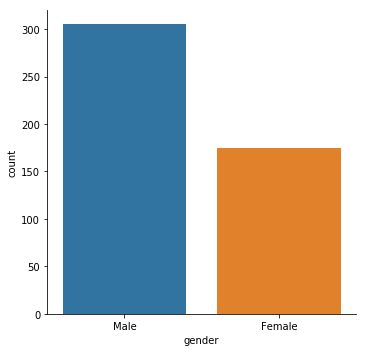

In [32]:
#sex
fig1=sns.catplot(x='gender',kind='count',data=data1)
fig1
fig1.savefig("output1.png")


In [33]:
data1.columns

Index(['gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester',
       'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Participation_by_hand_raising',
       'Library Usage', 'Reading of Notice Board',
       'Participation_in_class_discussion', 'Class_Attendence'],
      dtype='object')

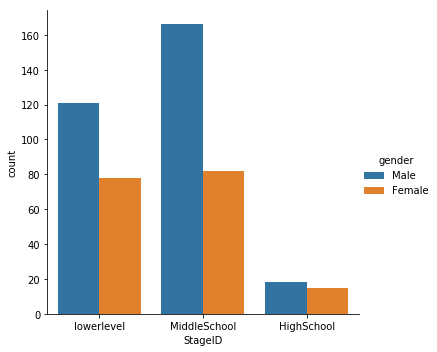

In [34]:
sns.catplot(x='StageID',hue='gender',kind='count',data=data1);


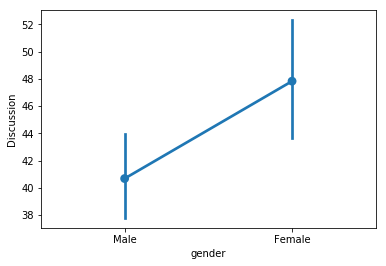

In [35]:
def install_opener(opener):
    sns.set(style="darkgrid")
    sns.load_dataset(data1)
sns.pointplot(x="gender", y="Discussion", data=data1);

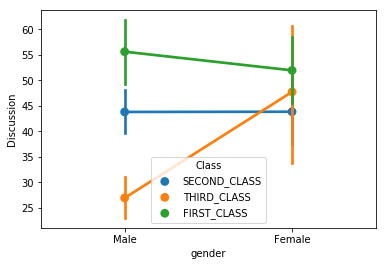

In [36]:
sns.pointplot(x="gender", y="Discussion", hue='Class',data=data1);

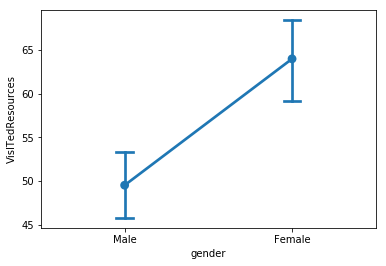

In [37]:
sns.pointplot(x="gender", y="VisITedResources", data=data1, capsize=.1)

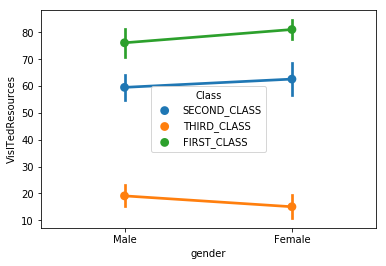

In [38]:
sns.pointplot(x="gender", y="VisITedResources", hue='Class',data=data1);

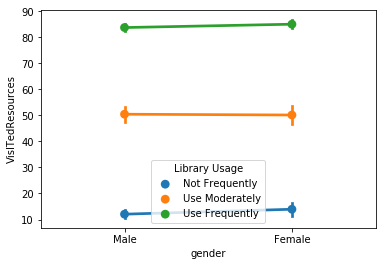

In [39]:
sns.pointplot(x="gender", y="VisITedResources", hue='Library Usage',data=data1);

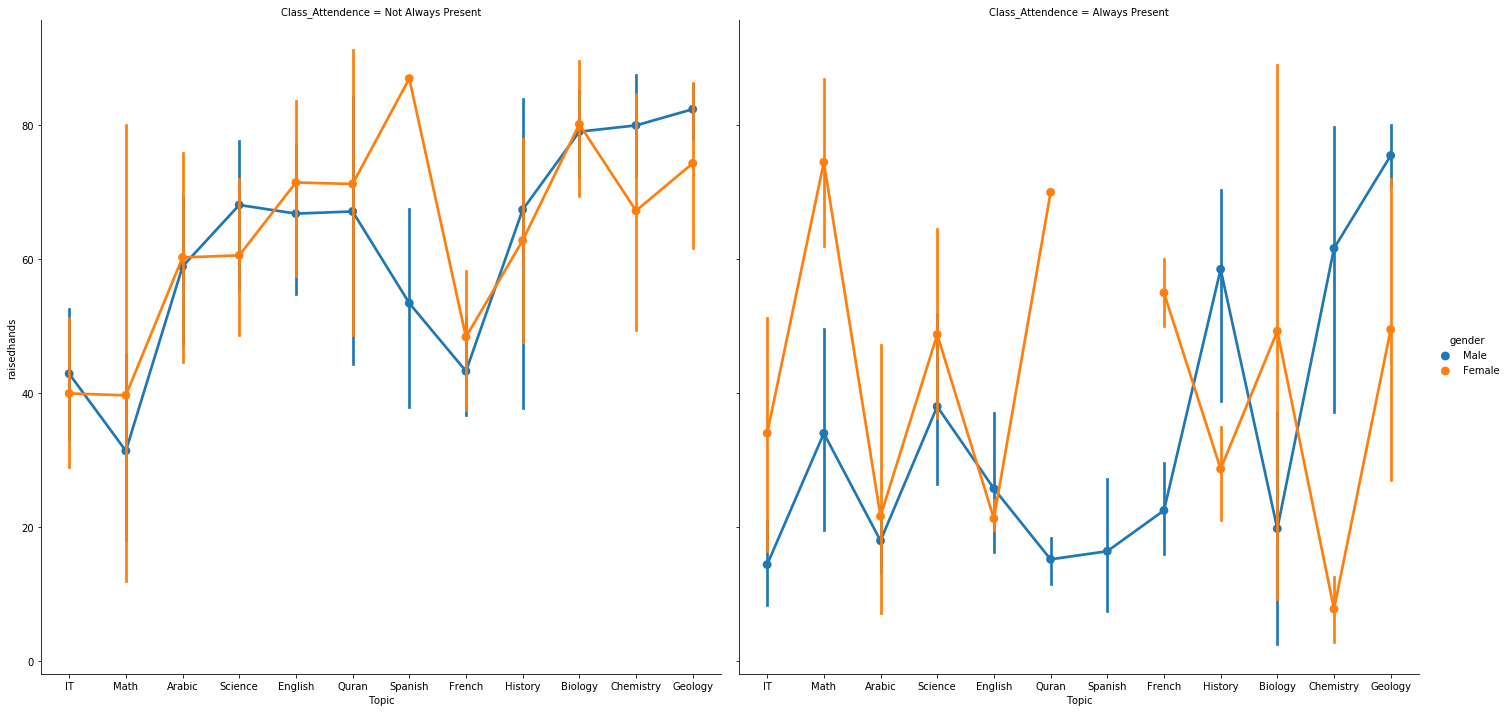

In [40]:
sns.catplot(x="Topic", y="raisedhands",hue="gender", col="Class_Attendence",data=data1, kind="point",aspect=1,height=10);

In [41]:
data1.Semester.value_counts()

First_Semester     245
Second_Semester    235
Name: Semester, dtype: int64

In [42]:
FS=data1.loc[data1['Semester']=='First_Semester']
FS

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion,Class_Attendence
0,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,15,16,2,20,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
1,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,20,20,3,25,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
2,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,10,7,0,30,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
3,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,30,25,5,35,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active,Always Present
4,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,40,50,12,50,No,Bad,Above-7,SECOND_CLASS,Active,Use Moderately,Not Regularly,Active,Always Present
5,Female,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,42,30,13,70,Yes,Bad,Above-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Very Active,Always Present
6,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,35,12,0,17,No,Bad,Above-7,THIRD_CLASS,Active,Not Frequently,Not Regularly,Not Active,Always Present
7,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,10,15,22,Yes,Good,Under-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Not Active,Not Always Present
8,Female,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,12,21,16,50,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Active,Not Always Present
9,Female,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,70,80,25,70,Yes,Good,Under-7,SECOND_CLASS,Very Active,Use Frequently,Not Regularly,Very Active,Not Always Present


In [43]:
FS.Relation.value_counts()

Father    162
Mum        83
Name: Relation, dtype: int64

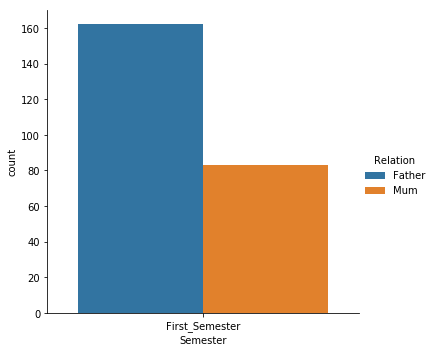

In [44]:
sns.catplot(x='Semester',hue='Relation',kind='count',data=FS)

In [45]:
SS=data1.loc[data1['Semester']=='Second_Semester']
SS

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion,Class_Attendence
132,Male,Kuwait,lowerlevel,G-02,IT,Second_Semester,Father,0,3,10,3,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
133,Male,Kuwait,lowerlevel,G-02,IT,Second_Semester,Father,12,60,0,70,Yes,Good,Above-7,THIRD_CLASS,Not Active,Use Moderately,Not Regularly,Very Active,Always Present
134,Male,Kuwait,MiddleSchool,G-07,Quran,Second_Semester,Father,80,80,15,70,Yes,Good,Under-7,FIRST_CLASS,Very Active,Use Frequently,Not Regularly,Very Active,Not Always Present
135,Female,Egypt,MiddleSchool,G-07,Quran,Second_Semester,Mum,70,80,95,70,Yes,Good,Under-7,FIRST_CLASS,Very Active,Use Frequently,Always Read's the Notice Board,Very Active,Not Always Present
136,Female,Kuwait,HighSchool,G-11,Quran,Second_Semester,Mum,70,80,95,70,Yes,Good,Under-7,FIRST_CLASS,Very Active,Use Frequently,Always Read's the Notice Board,Very Active,Not Always Present
141,Male,Tunis,MiddleSchool,G-07,Quran,Second_Semester,Father,19,65,50,10,No,Bad,Above-7,THIRD_CLASS,Not Active,Use Moderately,Read's the Notice Board,Not Active,Always Present
142,Male,Tunis,MiddleSchool,G-07,Quran,Second_Semester,Father,10,75,55,11,Yes,Good,Under-7,SECOND_CLASS,Not Active,Use Frequently,Read's the Notice Board,Not Active,Not Always Present
143,Male,Kuwait,MiddleSchool,G-07,Quran,Second_Semester,Father,80,90,55,19,Yes,Good,Under-7,FIRST_CLASS,Very Active,Use Frequently,Read's the Notice Board,Not Active,Not Always Present
144,Male,Kuwait,MiddleSchool,G-07,Quran,Second_Semester,Father,10,10,15,19,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
145,Male,Tunis,MiddleSchool,G-07,Quran,Second_Semester,Father,70,75,55,11,Yes,Bad,Under-7,SECOND_CLASS,Very Active,Use Frequently,Read's the Notice Board,Not Active,Not Always Present


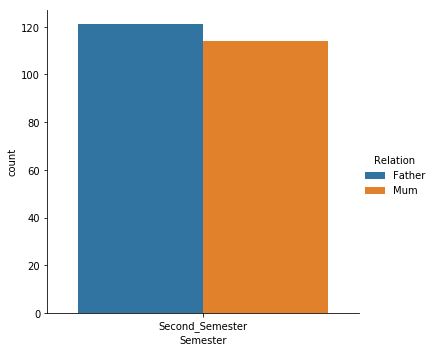

In [46]:
sns.catplot(x='Semester',hue='Relation',kind='count',data=SS)

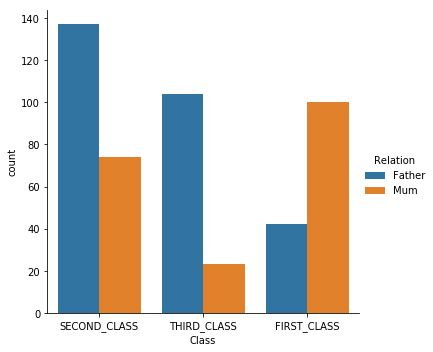

In [47]:
sns.catplot(x='Class',hue='Relation',kind='count',data=data1)

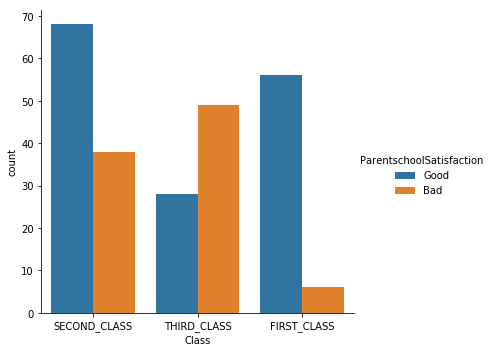

In [48]:
sns.catplot(x='Class',hue='ParentschoolSatisfaction',kind='count',data=FS)

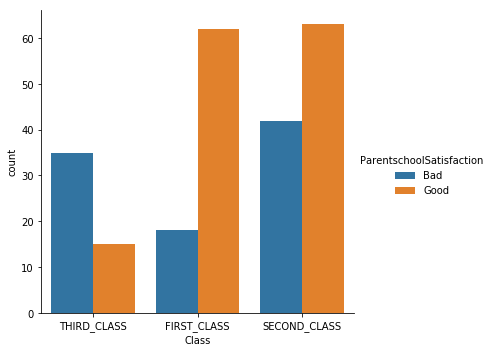

In [49]:
sns.catplot(x='Class',hue='ParentschoolSatisfaction',kind='count',data=SS)

In [50]:
data1.StageID.value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

In [51]:
LL=data1.loc[data1['StageID']=='lowerlevel']
LL

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion,Class_Attendence
0,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,15,16,2,20,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
1,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,20,20,3,25,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
2,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,10,7,0,30,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
3,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,30,25,5,35,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active,Always Present
4,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,40,50,12,50,No,Bad,Above-7,SECOND_CLASS,Active,Use Moderately,Not Regularly,Active,Always Present
5,Female,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,42,30,13,70,Yes,Bad,Above-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Very Active,Always Present
12,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,5,1,0,11,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
32,Female,Kuwait,lowerlevel,G-07,IT,First_Semester,Father,2,19,10,50,Yes,Good,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active,Always Present
33,Male,Kuwait,lowerlevel,G-05,English,First_Semester,Father,8,22,9,40,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active,Always Present
46,Male,Kuwait,lowerlevel,G-05,English,First_Semester,Father,7,10,1,30,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present


In [52]:
LL.NationalITy.value_counts()

Jordan         76
Kuwait         74
Palestine      12
Iraq           10
lebanon         5
Lybia           4
Egypt           4
Syria           3
SaudiArabia     3
Iran            3
Tunis           2
USA             2
Morocco         1
Name: NationalITy, dtype: int64

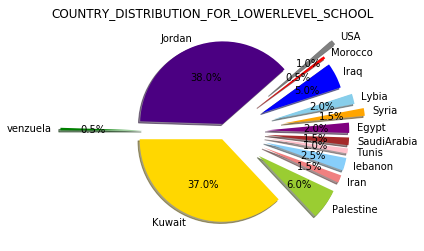

In [53]:
labels = 'Kuwait', 'Palestine', 'Iran', 'lebanon','Tunis','SaudiArabia','Egypt','Syria','Lybia','Iraq','Morocco','USA','Jordan','venzuela'
sizes = [74, 12, 3, 5,2,3,4,3,4,10,1,2,76,1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','brown','purple','orange','skyblue','blue','red','gray','indigo','green']
explode = (0.1,0.5, 0.5, 0.5,.5,.5,.5,.7,.6,0.5,0.5,.7,0.1,1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.rcParams['figure.figsize']=(8,10)
plt.axis('equal')
plt.title('COUNTRY_DISTRIBUTION_FOR_LOWERLEVEL_SCHOOL')
plt.show()

In [54]:
MS=data1.loc[data1['StageID']=='MiddleSchool']
MS

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion,Class_Attendence
6,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,35,12,0,17,No,Bad,Above-7,THIRD_CLASS,Active,Not Frequently,Not Regularly,Not Active,Always Present
7,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,10,15,22,Yes,Good,Under-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Not Active,Not Always Present
8,Female,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,12,21,16,50,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Active,Not Always Present
9,Female,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,70,80,25,70,Yes,Good,Under-7,SECOND_CLASS,Very Active,Use Frequently,Not Regularly,Very Active,Not Always Present
10,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,88,30,80,Yes,Good,Under-7,FIRST_CLASS,Active,Use Frequently,Not Regularly,Very Active,Not Always Present
11,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,19,6,19,12,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
13,Male,lebanon,MiddleSchool,G-08,Math,First_Semester,Father,20,14,12,19,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
14,Female,Kuwait,MiddleSchool,G-08,Math,First_Semester,Mum,62,70,44,60,No,Bad,Above-7,FIRST_CLASS,Active,Use Frequently,Read's the Notice Board,Active,Always Present
15,Female,Kuwait,MiddleSchool,G-06,IT,First_Semester,Father,30,40,22,66,Yes,Good,Under-7,SECOND_CLASS,Not Active,Use Moderately,Not Regularly,Very Active,Not Always Present
16,Male,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,36,30,20,80,No,Bad,Above-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Very Active,Always Present


In [55]:
MS.NationalITy.value_counts()

Jordan         96
Kuwait         84
Palestine      16
Iraq           12
lebanon        12
Tunis           8
Egypt           5
Syria           4
Morocco         3
SaudiArabia     2
Lybia           2
Iran            2
USA             2
Name: NationalITy, dtype: int64

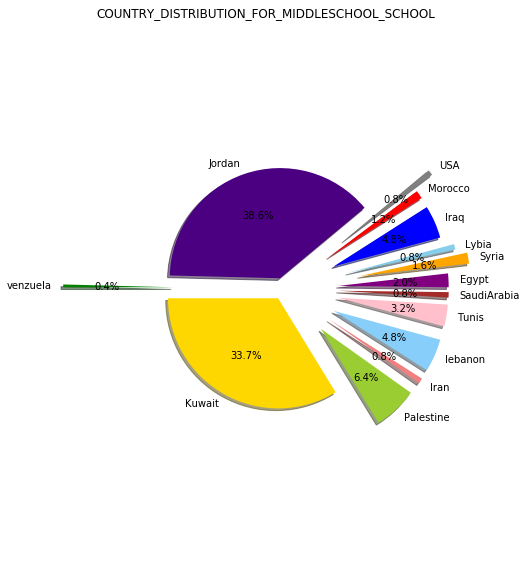

In [56]:
labels = 'Kuwait', 'Palestine', 'Iran', 'lebanon','Tunis','SaudiArabia','Egypt','Syria','Lybia','Iraq','Morocco','USA','Jordan','venzuela'
sizes = [84, 16, 2, 12,8,2,5,4,2,12,3,2,96,1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','brown','purple','orange','skyblue','blue','red','gray','indigo','green']
explode = (0.1,0.5, 0.5, 0.5,.5,.5,.5,.7,.6,0.5,0.5,.7,0.1,1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.rcParams['figure.figsize']=(8,10)
plt.axis('equal')
plt.title('COUNTRY_DISTRIBUTION_FOR_MIDDLESCHOOL_SCHOOL')
plt.show()

In [57]:
HS=data1.loc[data1['StageID']=='HighSchool']

In [58]:
HS.NationalITy.value_counts()

Kuwait         21
SaudiArabia     6
Tunis           2
USA             2
venzuela        1
Iran            1
Name: NationalITy, dtype: int64

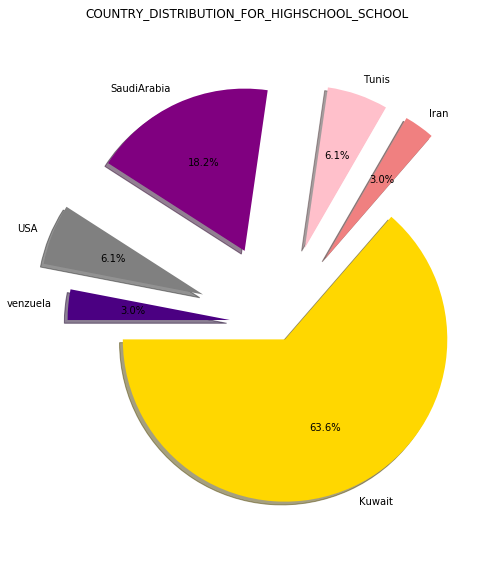

In [59]:
labels = 'Kuwait', 'Iran','Tunis','SaudiArabia','USA','venzuela'
sizes = [21,1,2,6,2,1]
colors = ['gold', 'lightcoral','pink','purple','gray','indigo']
explode = (0.1,0.5, 0.5, 0.5,.5,.3)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.rcParams['figure.figsize']=(8,10)
plt.axis('equal')
plt.title('COUNTRY_DISTRIBUTION_FOR_HIGHSCHOOL_SCHOOL')
plt.show()

In [60]:
data1

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Participation_by_hand_raising,Library Usage,Reading of Notice Board,Participation_in_class_discussion,Class_Attendence
0,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,15,16,2,20,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
1,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,20,20,3,25,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Not Always Present
2,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,10,7,0,30,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Not Active,Always Present
3,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,30,25,5,35,No,Bad,Above-7,THIRD_CLASS,Not Active,Not Frequently,Not Regularly,Active,Always Present
4,Male,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,40,50,12,50,No,Bad,Above-7,SECOND_CLASS,Active,Use Moderately,Not Regularly,Active,Always Present
5,Female,Kuwait,lowerlevel,G-04,IT,First_Semester,Father,42,30,13,70,Yes,Bad,Above-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Very Active,Always Present
6,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,35,12,0,17,No,Bad,Above-7,THIRD_CLASS,Active,Not Frequently,Not Regularly,Not Active,Always Present
7,Male,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,50,10,15,22,Yes,Good,Under-7,SECOND_CLASS,Active,Not Frequently,Not Regularly,Not Active,Not Always Present
8,Female,Kuwait,MiddleSchool,G-07,Math,First_Semester,Father,12,21,16,50,Yes,Good,Under-7,SECOND_CLASS,Not Active,Not Frequently,Not Regularly,Active,Not Always Present
9,Female,Kuwait,MiddleSchool,G-07,IT,First_Semester,Father,70,80,25,70,Yes,Good,Under-7,SECOND_CLASS,Very Active,Use Frequently,Not Regularly,Very Active,Not Always Present


In [61]:
data1.drop(['GradeID'],axis=1,inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [63]:
data1['Relation']=le.fit_transform(data1['Relation'])

In [64]:
data1['gender']=le.fit_transform(data1['gender'])

In [65]:
data1['Semester']=le.fit_transform(data1['Semester'])

In [66]:
data1['ParentAnsweringSurvey']=le.fit_transform(data1['ParentAnsweringSurvey'])

In [67]:
data1['ParentschoolSatisfaction']=le.fit_transform(data1['ParentschoolSatisfaction'])

In [68]:
data1['StudentAbsenceDays']=le.fit_transform(data1['StudentAbsenceDays'])

In [69]:
data1['Class_Attendence']=le.fit_transform(data1['Class_Attendence'])

In [70]:
data2=pd.get_dummies(data1,columns=['NationalITy','StageID','Topic','Participation_by_hand_raising','Library Usage','Reading of Notice Board','Participation_in_class_discussion'])
data2

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_Attendence,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_Kuwait,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Participation_by_hand_raising_Active,Participation_by_hand_raising_Not Active,Participation_by_hand_raising_Very Active,Library Usage_Not Frequently,Library Usage_Use Frequently,Library Usage_Use Moderately,Reading of Notice Board_Always Read's the Notice Board,Reading of Notice Board_Not Regularly,Reading of Notice Board_Read's the Notice Board,Participation_in_class_discussion_Active,Participation_in_class_discussion_Not Active,Participation_in_class_discussion_Very Active
0,1,0,0,15,16,2,20,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,1,0,0,20,20,3,25,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,10,7,0,30,0,0,0,THIRD_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
3,1,0,0,30,25,5,35,0,0,0,THIRD_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,1,0,0,40,50,12,50,0,0,0,SECOND_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
5,0,0,0,42,30,13,70,1,0,0,SECOND_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,35,12,0,17,0,0,0,THIRD_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7,1,0,0,50,10,15,22,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
8,0,0,0,12,21,16,50,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
9,0,0,0,70,80,25,70,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [71]:
data2.drop(1)

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_Attendence,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_Kuwait,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Participation_by_hand_raising_Active,Participation_by_hand_raising_Not Active,Participation_by_hand_raising_Very Active,Library Usage_Not Frequently,Library Usage_Use Frequently,Library Usage_Use Moderately,Reading of Notice Board_Always Read's the Notice Board,Reading of Notice Board_Not Regularly,Reading of Notice Board_Read's the Notice Board,Participation_in_class_discussion_Active,Participation_in_class_discussion_Not Active,Participation_in_class_discussion_Very Active
0,1,0,0,15,16,2,20,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,10,7,0,30,0,0,0,THIRD_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
3,1,0,0,30,25,5,35,0,0,0,THIRD_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,1,0,0,40,50,12,50,0,0,0,SECOND_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
5,0,0,0,42,30,13,70,1,0,0,SECOND_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,35,12,0,17,0,0,0,THIRD_CLASS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7,1,0,0,50,10,15,22,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
8,0,0,0,12,21,16,50,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
9,0,0,0,70,80,25,70,1,1,1,SECOND_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
10,1,0,0,50,88,30,80,1,1,1,FIRST_CLASS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [72]:
data2['Class']=le.fit_transform(data2['Class'])
data2

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_Attendence,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_Kuwait,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Participation_by_hand_raising_Active,Participation_by_hand_raising_Not Active,Participation_by_hand_raising_Very Active,Library Usage_Not Frequently,Library Usage_Use Frequently,Library Usage_Use Moderately,Reading of Notice Board_Always Read's the Notice Board,Reading of Notice Board_Not Regularly,Reading of Notice Board_Read's the Notice Board,Participation_in_class_discussion_Active,Participation_in_class_discussion_Not Active,Participation_in_class_discussion_Very Active
0,1,0,0,15,16,2,20,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,1,0,0,20,20,3,25,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,10,7,0,30,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
3,1,0,0,30,25,5,35,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
4,1,0,0,40,50,12,50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
5,0,0,0,42,30,13,70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,35,12,0,17,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7,1,0,0,50,10,15,22,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
8,0,0,0,12,21,16,50,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
9,0,0,0,70,80,25,70,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [73]:
X=data2.drop(['Class'],axis=1)

In [74]:
Y=data2.iloc[:,10:11]

In [75]:
Y

,Class
0,1
1,1
2,2
3,2
4,1
5,1
6,2
7,1
8,1
9,1


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [77]:
X_train.head()

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class_Attendence,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_Kuwait,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Participation_by_hand_raising_Active,Participation_by_hand_raising_Not Active,Participation_by_hand_raising_Very Active,Library Usage_Not Frequently,Library Usage_Use Frequently,Library Usage_Use Moderately,Reading of Notice Board_Always Read's the Notice Board,Reading of Notice Board_Not Regularly,Reading of Notice Board_Read's the Notice Board,Participation_in_class_discussion_Active,Participation_in_class_discussion_Not Active,Participation_in_class_discussion_Very Active
374,1,0,0,10,10,40,51,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
264,0,0,1,70,64,42,32,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
235,1,1,0,12,8,18,26,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
200,1,1,1,15,90,52,83,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
213,1,1,0,7,61,22,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0


In [78]:
Y_train.head()

,Class
374,2
264,1
235,2
200,0
213,2


In [79]:
from sklearn.preprocessing import StandardScaler
SC_X=StandardScaler()
SC_Y=StandardScaler()

In [80]:
X_train=SC_X.fit_transform(X_train)

C:\Users\User\Anaconda31\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:
X_test=SC_X.fit_transform(X_test)

C:\Users\User\Anaconda31\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [82]:
Y=le.fit_transform(Y)

C:\Users\User\Anaconda31\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
#SPLIT DATASET INTO TRAIN AND TEST DATA

In [84]:
X_train

array([[ 0.80502712, -0.95417386, -0.83164293, ...,  1.41421356,
        -0.80502712, -0.6134689 ],
       [-1.24219417, -0.95417386,  1.20243913, ...,  1.41421356,
        -0.80502712, -0.6134689 ],
       [ 0.80502712,  1.04802703, -0.83164293, ..., -0.70710678,
         1.24219417, -0.6134689 ],
       ...,
       [-1.24219417, -0.95417386,  1.20243913, ..., -0.70710678,
         1.24219417, -0.6134689 ],
       [-1.24219417, -0.95417386,  1.20243913, ..., -0.70710678,
        -0.80502712,  1.63007449],
       [ 0.80502712,  1.04802703,  1.20243913, ..., -0.70710678,
         1.24219417, -0.6134689 ]])

In [85]:
X_test

array([[-1.73205081, -1.08711461, -0.84515425, ..., -0.52915026,
        -0.91986621,  1.44802424],
       [ 0.57735027, -1.08711461, -0.84515425, ..., -0.52915026,
         1.08711461, -0.69059617],
       [ 0.57735027,  0.91986621, -0.84515425, ..., -0.52915026,
         1.08711461, -0.69059617],
       ...,
       [ 0.57735027, -1.08711461, -0.84515425, ...,  1.88982237,
        -0.91986621, -0.69059617],
       [ 0.57735027, -1.08711461, -0.84515425, ..., -0.52915026,
        -0.91986621,  1.44802424],
       [ 0.57735027,  0.91986621,  1.18321596, ...,  1.88982237,
        -0.91986621, -0.69059617]])

In [86]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-1.732051,-1.087115,-0.845154,-0.564067,-0.463587,-0.660393,0.831186,0.707107,0.641689,0.791908,0.791908,-0.234404,-0.102598,-0.208514,-0.723747,1.350381,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,-0.145865,-0.102598,-0.145865,0.0,-0.179605,0.881917,-0.827170,-0.340997,-0.301511,-0.179605,-0.208514,-0.447214,-0.280449,-0.179605,2.155704,-0.280449,-0.258199,-0.359738,-0.208514,-0.593391,1.262773,-0.740532,-0.690596,-1.021055,2.236068,-0.593391,1.110206,-0.641689,-0.529150,-0.919866,1.448024
1,0.577350,-1.087115,-0.845154,-1.558871,-1.455166,-1.290171,-0.916125,0.707107,-1.558387,0.791908,0.791908,-0.234404,-0.102598,-0.208514,-0.723747,1.350381,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,-0.145865,-0.102598,-0.145865,0.0,-0.179605,-1.133893,1.208941,-0.340997,-0.301511,-0.179605,-0.208514,-0.447214,-0.280449,-0.179605,2.155704,-0.280449,-0.258199,-0.359738,-0.208514,-0.593391,1.262773,-0.740532,1.448024,-1.021055,-0.447214,-0.593391,1.110206,-0.641689,-0.529150,1.087115,-0.690596
2,0.577350,0.919866,-0.845154,-0.928829,0.265515,0.319263,-1.087430,-1.414214,-1.558387,-1.262773,-1.262773,-0.234404,-0.102598,-0.208514,-0.723747,-0.740532,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,6.855655,-0.102598,-0.145865,0.0,-0.179605,0.881917,-0.827170,-0.340997,-0.301511,-0.179605,-0.208514,-0.447214,-0.280449,-0.179605,-0.463886,-0.280449,3.872983,-0.359738,-0.208514,-0.593391,1.262773,-0.740532,-0.690596,-1.021055,2.236068,-0.593391,-0.900733,1.558387,-0.529150,1.087115,-0.690596
3,0.577350,0.919866,1.183216,0.065975,1.111273,0.039361,-1.190213,-1.414214,-1.558387,-1.262773,-1.262773,4.266146,-0.102598,-0.208514,-0.723747,-0.740532,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,-0.145865,-0.102598,-0.145865,0.0,-0.179605,-1.133893,1.208941,-0.340997,-0.301511,-0.179605,-0.208514,-0.447214,-0.280449,-0.179605,-0.463886,3.565710,-0.258199,-0.359738,-0.208514,1.685230,-0.791908,-0.740532,-0.690596,0.979379,-0.447214,-0.593391,-0.900733,1.558387,-0.529150,1.087115,-0.690596
4,0.577350,0.919866,-0.845154,-0.232466,0.178022,1.473856,-0.299427,0.707107,0.641689,0.791908,0.791908,-0.234404,-0.102598,-0.208514,-0.723747,1.350381,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,-0.145865,-0.102598,-0.145865,0.0,-0.179605,-1.133893,1.208941,-0.340997,-0.301511,-0.179605,-0.208514,2.236068,-0.280449,-0.179605,-0.463886,-0.280449,-0.258199,-0.359738,-0.208514,1.685230,-0.791908,-0.740532,-0.690596,-1.021055,2.236068,1.685230,-0.900733,-0.641689,1.889822,-0.919866,-0.690596
5,0.577350,0.919866,-0.845154,-1.227270,0.557156,0.494201,-1.053169,0.707107,0.641689,0.791908,0.791908,-0.234404,-0.102598,-0.208514,-0.723747,-0.740532,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,6.855655,-0.102598,-0.145865,0.0,-0.179605,0.881917,-0.827170,-0.340997,-0.301511,-0.179605,-0.208514,-0.447214,-0.280449,-0.179605,-0.463886,-0.280449,3.872983,-0.359738,-0.208514,-0.593391,1.262773,-0.740532,-0.690596,0.979379,-0.447214,-0.593391,-0.900733,1.558387,-0.529150,1.087115,-0.690596
6,0.577350,0.919866,-0.845154,1.392380,1.052945,1.683783,1.413623,0.707107,0.641689,0.791908,0.791908,-0.234404,-0.102598,-0.208514,-0.723747,-0.740532,-0.102598,-0.102598,3.109126,-0.102598,-0.145865,-0.145865,-0.102598,-0.145865,0.0,-0.179605,0.881917,-0.827170,-0.340997,3.316625,-0.179605,-0.208514,-0.447214,-0.280449,-0.179605,-0.463886,-0.280449,-0.258199,-0.359738,-0.208514,-0.593391,-0.791908,1.350381,-0.690596,0.979379,-0.447214,1.685230,-0.900733,-0.641689,-0.529150,-0.919866,1.448024
7,0.577350,0.919866,-0.845154,-1.194110,-1.571823,-1.115233,0.248749,-1.414214,-1.558387,-1.262773,-1.262773,-0.234404,-0.102598,-0.208514,1.381699,-0.740532,-0.102598,-0.102598,-0.321634,-0.102598,-0.145865,-0.145865,-0.102598,-0.145865,0.0,-0.179605,0.881917,-0.827170,-0.340997,-0.301511,5.567764,-0.208514,-0.447214,-0.280449,-0.17

In [87]:
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.805027,-0.954174,-0.831643,-1.188505,-1.360675,0.108442,0.269649,-1.075780,-1.183216,-1.222091,-1.222091,-0.102598,-0.114859,-0.221766,1.327626,-0.778906,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,-0.163517,-0.114859,-0.201619,-0.051098,-0.291111,-1.010471,1.183216,2.614715,-0.246523,-0.240523,-0.345736,-0.382451,-0.215224,-0.208514,-0.504878,-0.194520,-0.208514,-0.340997,-0.240523,-0.476274,1.183216,-0.813841,1.430950,-0.984495,-0.468025,-0.463886,-0.934436,1.342728,1.414214,-0.805027,-0.613469
1,-1.242194,-0.954174,1.202439,0.753701,0.289612,0.185342,-0.429235,-1.075780,-1.183216,0.818270,0.818270,-0.102598,-0.114859,-0.221766,1.327626,-0.778906,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,-0.163517,-0.114859,-0.201619,-0.051098,-0.291111,0.989637,-0.845154,-0.382451,-0.246523,-0.240523,2.892379,-0.382451,-0.215224,-0.208514,-0.504878,-0.194520,-0.208514,-0.340997,-0.240523,-0.476274,-0.845154,1.228741,-0.698836,-0.984495,2.136637,-0.463886,-0.934436,1.342728,1.414214,-0.805027,-0.613469
2,0.805027,1.048027,-0.831643,-1.123765,-1.421796,-0.737464,-0.649935,-1.075780,-1.183216,-1.222091,-1.222091,-0.102598,-0.114859,-0.221766,-0.753224,1.283852,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,-0.163517,-0.114859,-0.201619,-0.051098,-0.291111,0.989637,-0.845154,-0.382451,-0.246523,-0.240523,-0.345736,-0.382451,-0.215224,-0.208514,-0.504878,-0.194520,-0.208514,2.932576,-0.240523,-0.476274,1.183216,-0.813841,1.430950,-0.984495,-0.468025,-0.463886,1.070164,-0.744752,-0.707107,1.242194,-0.613469
3,0.805027,1.048027,1.202439,-1.026655,1.084194,0.569845,1.446715,0.929558,-1.183216,0.818270,0.818270,-0.102598,-0.114859,-0.221766,-0.753224,1.283852,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,-0.163517,-0.114859,-0.201619,-0.051098,-0.291111,0.989637,-0.845154,2.614715,-0.246523,-0.240523,-0.345736,-0.382451,-0.215224,-0.208514,-0.504878,-0.194520,-0.208514,-0.340997,-0.240523,-0.476274,1.183216,-0.813841,-0.698836,1.015749,-0.468025,-0.463886,-0.934436,1.342728,-0.707107,-0.805027,1.630074
4,0.805027,1.048027,-0.831643,-1.285615,0.197929,-0.583663,-1.091334,-1.075780,-1.183216,-1.222091,-1.222091,-0.102598,-0.114859,-0.221766,-0.753224,-0.778906,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,6.115554,-0.114859,-0.201619,-0.051098,-0.291111,0.989637,-0.845154,-0.382451,-0.246523,-0.240523,-0.345736,-0.382451,-0.215224,-0.208514,-0.504878,-0.194520,-0.208514,-0.340997,4.157609,-0.476274,1.183216,-0.813841,-0.698836,-0.984495,2.136637,-0.463886,1.070164,-0.744752,-0.707107,1.242194,-0.613469
5,0.805027,-0.954174,1.202439,1.142142,-0.718896,0.569845,-0.686718,-1.075780,0.845154,0.818270,0.818270,-0.102598,-0.114859,-0.221766,-0.753224,-0.778906,-0.114859,-0.088736,4.382981,-0.163517,-0.114859,-0.163517,-0.114859,-0.201619,-0.051098,-0.291111,0.989637,-0.845154,-0.382451,-0.246523,-0.240523,2.892379,-0.382451,-0.215224,-0.208514,-0.504878,-0.194520,-0.208514,-0.340997,-0.240523,-0.476274,-0.845154,1.228741,-0.698836,-0.984495,2.136637,-0.463886,-0.934436,1.342728,-0.707107,1.242194,-0.613469
6,-1.242194,-0.954174,-0.831643,-0.638214,-0.993944,-0.583663,-0.134968,-1.075780,0.845154,0.818270,0.818270,-0.102598,-0.114859,-0.221766,-0.753224,-0.778906,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,-0.163517,8.706320,-0.201619,-0.051098,-0.291111,0.989637,-0.845154,-0.382451,-0.246523,-0.240523,-0.345736,-0.382451,-0.215224,-0.208514,-0.504878,5.140873,-0.208514,-0.340997,-0.240523,-0.476274,1.183216,-0.813841,1.430950,-0.984495,-0.468025,-0.463886,1.070164,-0.744752,1.414214,-0.805027,-0.613469
7,0.805027,-0.954174,-0.831643,-0.929544,-1.146749,-0.429862,-0.355668,-1.075780,0.845154,-1.222091,-1.222091,-0.102598,-0.114859,-0.221766,1.327626,-0.778906,-0.114859,-0.088736,-0.228155,-0.163517,-0.114859,-0.163517,-0.114859,-0.201619,-0.051098,-0.291111,-1.010471,1.183216,-0.

In [88]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear',multi_class='ovr')))
classifier.append(("DecisionTree", DecisionTreeClassifier(criterion ='entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))

In [90]:
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LogisticReg: 0.732051 (0.082926)
DecisionTree: 0.708232 (0.078876)


C:\Users\User\Anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

KNN: 0.661471 (0.080363)


C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

KernelSVM: 0.723752 (0.069267)


C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

NaiveBayes: 0.539676 (0.084872)


C:\Users\User\Anaconda31\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

RandomForest: 0.755263 (0.052173)


In [91]:
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
Classifier.fit(X_train,Y_train)

C:\Users\User\Anaconda31\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [92]:
Y_pred=Classifier.predict(X_test)

In [93]:
Y_pred

array([1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1,
       1, 0, 2, 0, 0, 1, 1, 0])

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [95]:
cm=confusion_matrix(Y_test,Y_pred)

In [96]:
cm

array([[18, 10,  0],
       [ 8, 31,  6],
       [ 0,  0, 23]], dtype=int64)

In [97]:
accuracyscore=accuracy_score(Y_test, Y_pred)
accuracyscore

0.75